# Techniques of High Performance Computing: First Assignment
### Jan Zmazek, Scientific Computing
This Python package imports a triangular grid from a legacy vtk file, or creates a square grid with $m\cdot n$ nodes, and solves a diffusion equation
$$\begin{cases}
-\nabla\cdot\sigma(r)\nabla u(r)=f(r) & \text{in } \Omega\\
u(r)=0 &\text{on }\partial\Omega.
\end{cases}$$
using a finite element method. It consists of three classes of methods: grid (to read a vtk file), squareGrid (to create a square grid) and fem (finite element method).


## Examples

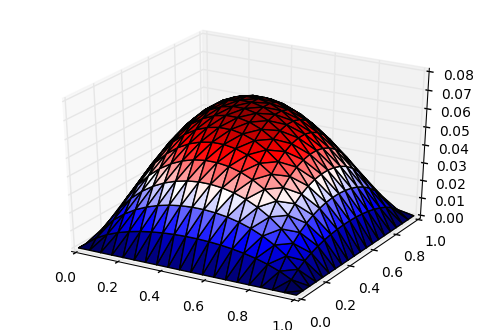

In [1]:
from main import solve, plot

def f(x,y):
    return 1

def sigma(x,y):
    return 1

plot(20,20, sigma, f)
